In [37]:
import pandas as pd
df = pd.read_csv('../input/weatherAUS.csv') #read csv-type data using pandas
df = df.drop( ['RISK_MM'] , axis=1 ) #drop RISK_MM because it is leaked information

In [38]:
df.info() #look at the description of the data
#There are 7 object-type columns and the remaining columns are float64-type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [39]:
#A rule of thumb is to clean the training data first, then apply the same process to the testing data
df.isnull().sum() * 100 / len(df)  #calculate the percentage of missing data in each column 

Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RainTomorrow      0.000000
dtype: float64

In [40]:
''' DECISION:
drop Evaporation, Sunshine, Cloud9am, Cloud3pm out of the data'''
df = df.drop( ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1 )

In [41]:
''' OBSERVATION: 
RainToday and RainTomorrow are object-type and must be transfromed into interger-type '''
df['RainToday'] = df['RainToday'].map( {'No':0, 'Yes':1} ) #replacing Yes/No with 1/0
df['RainTomorrow'] = df['RainTomorrow'].map( {'No':0, 'Yes': 1} ) #replacing Yes/No in the target column with 1/0

In [42]:
''' OBSERVATION:
Date --> extract month from date'''
df['Date'] = pd.to_datetime( df['Date'] ).dt.month
df.rename(columns={'Date':'Month'}, inplace=True) #rename the title of column 'Date' into 'Month'

In [43]:
#see how df looks like
df.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,12,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,12,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,12,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0
4,12,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0


In [44]:
''' OBSERVATION:
Location should be transfromed into interger or float64'''
df['Location'].value_counts() #see how many locations we have

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cobar               2988
Cairns              2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
NorfolkIsland       2964
Penrith             2964
Newcastle           2955
SalmonGums          2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [45]:
#create a list of distinct locations
Location_list = df['Location'].value_counts().index.tolist() 
#create a dictionary which will be used later by map(...) method
Location_mapping = { i:j for i,j in zip( Location_list, range(len(Location_list)) ) } 
#transform distinct locations in the column 'Location' into distinct integers
df['Location'] = df['Location'].map( Location_mapping ) 

In [46]:
#see how df looks like
df.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12,14,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,12,14,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,12,14,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,12,14,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0
4,12,14,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0


In [47]:
''' OBSERVATION:
WindGustDir should be transfromed into interger or float64'''
WindGustDir_list = df['WindGustDir'].value_counts().index.tolist()
WindGustDir_mapping = { i:j for i,j in zip( WindGustDir_list, range(len(WindGustDir_list)) ) } 
df['WindGustDir'] = df['WindGustDir'].map( WindGustDir_mapping ) 

In [48]:
#see how df looks like
df.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12,14,13.4,22.9,0.6,0.0,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,12,14,7.4,25.1,0.0,9.0,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,12,14,12.9,25.7,0.0,6.0,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,12,14,9.2,28.0,0.0,13.0,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0
4,12,14,17.5,32.3,1.0,0.0,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0


In [49]:
''' OBSERVATION:
WindDir9am should be transfromed into interger or float64'''
WindDir9am_list = df['WindDir9am'].value_counts().index.tolist()
WindDir9am_mapping = { i:j for i,j in zip( WindDir9am_list, range(len(WindDir9am_list)) ) } 
df['WindDir9am'] = df['WindDir9am'].map( WindDir9am_mapping ) 

In [50]:
#see how df looks like
df.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12,14,13.4,22.9,0.6,0.0,44.0,6.0,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,12,14,7.4,25.1,0.0,9.0,44.0,9.0,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,12,14,12.9,25.7,0.0,6.0,46.0,6.0,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,12,14,9.2,28.0,0.0,13.0,24.0,1.0,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0
4,12,14,17.5,32.3,1.0,0.0,41.0,10.0,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0


In [51]:
''' OBSERVATION:
WindDir3pm should be transfromed into interger or float64'''
WindDir3pm_list = df['WindDir3pm'].value_counts().index.tolist()
WindDir3pm_mapping = { i:j for i,j in zip( WindDir3pm_list, range(len(WindDir3pm_list)) ) } 
df['WindDir3pm'] = df['WindDir3pm'].map( WindDir3pm_mapping ) 

In [52]:
#see how df looks like
df.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12,14,13.4,22.9,0.6,0.0,44.0,6.0,7.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,12,14,7.4,25.1,0.0,9.0,44.0,9.0,3.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,12,14,12.9,25.7,0.0,6.0,46.0,6.0,3.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,12,14,9.2,28.0,0.0,13.0,24.0,1.0,10.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0
4,12,14,17.5,32.3,1.0,0.0,41.0,10.0,8.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0


In [53]:
''' DEALING WITH MISSING DATA '''
#Before doing that, we MUST split df into training data and testing data
#This is because we do NOT deal with missing data on the whole dataset (i.e., df), but primarly on the training data
#For testing data, we RE-USE the new values raisen in processing the training data
from sklearn.model_selection import train_test_split #Using train_test_split(...) in the library sklearn
df_train, df_test = train_test_split( df, test_size = 0.25, random_state=42 )
df_train = df_train.copy()
df_test = df_test.copy()

In [54]:
#We want to create a new LIST by combining df_train and df_test 
df_combine = [ df_train, df_test ] #NOTICE: df_combine is a LIST but NOT a dataframe, we use df_combine in the loop for

In [55]:
'''WARNING: 
from now on, we primarily work on the TRAINING data df_train but not df'''
df_train.isnull().sum() * 100 / len(df_train) #calculate the percentage of missing data in each column 

Month            0.000000
Location         0.000000
MinTemp          0.463223
MaxTemp          0.240989
Rainfall         1.035220
WindGustDir      6.544203
WindGustSpeed    6.497318
WindDir9am       7.055249
WindDir3pm       2.646187
WindSpeed9am     0.935824
WindSpeed3pm     1.840704
Humidity9am      1.235888
Humidity3pm      2.557106
Pressure9am      9.888976
Pressure3pm      9.865534
Temp9am          0.634822
Temp3pm          1.936349
RainToday        1.035220
RainTomorrow     0.000000
dtype: float64

In [56]:
''' OBSERVATION:
Except for Month, Location, RISK_MM and RainTomorrow, all the remaining columns are MISSING data'''
#SEE WHICH COLUMNS ARE MISSING DATA 
cols_NaN_Index = df.columns[ df.isnull().any() ]
#see how it looks like
cols_NaN_Index

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [57]:
for col in cols_NaN_Index:
    mean_val = df_train[col].mean() #NOTE THAT THIS VALUE IS ALSO USED FOR FILLING NAN IN THE TESTING DATA
    df_train[col].fillna( mean_val, inplace=True )
    df_test[col].fillna( mean_val, inplace=True )

In [58]:
df_train.isnull().sum() * 100 / len(df_train)  #calculate the percentage of missing data in each column 

Month            0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

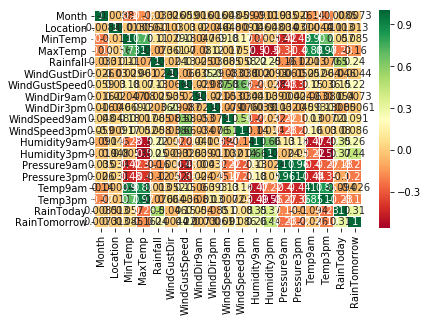

In [59]:
#Now there is not any NaN value
#It is time to look at a heatmap (using the library seaborn) to see the correlation among features
import seaborn as sns
import numpy as np
import matplotlib as plt
fig = sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #df_train.corr()-->correlation matrix

In [60]:
#We can see that 'MaxTemp' and 'Temp3pm' seem to be highly correlated.
#We want to make sure, so we will look at the numerical values
df_train.corr()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Month,1.000000,-0.008830,-0.202542,-0.163833,-0.032630,0.026398,0.058768,0.015884,0.015554,0.047852,0.059017,-0.091296,-0.019389,0.035353,0.025661,-0.135171,-0.173141,0.008511,0.007321
Location,-0.008830,1.000000,-0.013055,0.005608,0.011156,-0.029500,0.029993,0.020091,-0.046447,0.048418,-0.009092,0.045711,0.047795,0.033661,0.030860,0.000438,-0.011215,0.012608,0.012981
MinTemp,-0.202542,-0.013055,1.000000,0.733775,0.105054,0.029294,0.175297,-0.047215,0.068890,0.176677,0.174674,-0.231612,0.005303,-0.423808,-0.433602,0.897736,0.699559,0.057430,0.084708
MaxTemp,-0.163833,0.005608,0.733775,1.000000,-0.072522,0.060709,0.070032,-0.080461,0.118007,0.016790,0.051693,-0.498411,-0.500074,-0.308984,-0.397482,0.880317,0.969790,-0.225815,-0.159810
Rainfall,-0.032630,0.011156,0.105054,-0.072522,1.000000,-0.024152,0.125579,0.024734,-0.036235,0.085261,0.058069,0.222951,0.250780,-0.160133,-0.120514,0.012544,-0.076231,0.501780,0.238826
WindGustDir,0.026398,-0.029500,0.029294,0.060709,-0.024152,1.000000,-0.065883,0.034553,0.288945,-0.082716,-0.038430,0.001982,0.009265,-0.006112,-0.051685,0.051966,0.063535,-0.046455,0.004383
WindGustSpeed,0.058768,0.029993,0.175297,0.070032,0.125579,-0.065883,1.000000,-0.029276,-0.086697,0.577400,0.658167,-0.211727,-0.028113,-0.428316,-0.386491,0.149642,0.036007,0.148147,0.224230
WindDir9am,0.015884,0.020091,-0.047215,-0.080461,0.024734,0.034553,-0.029276,1.000000,-0.020813,-0.052635,-0.033943,0.040759,0.039217,-0.003958,0.023612,-0.063209,-0.080828,0.053884,0.007266
WindDir3pm,0.015554,-0.046447,0.068890,0.118007,-0.036235,0.288945,-0.086697,-0.020813,1.000000,-0.079261,-0.076389,-0.003914,-0.011203,0.032045,-0.044562,0.092830,0.128125,-0.084702,0.000613
WindSpeed9am,0.047852,0.048418,0.176677,0.016790,0.085261,-0.082716,0.577400,-0.052635,-0.079261,1.000000,0.512781,-0.269303,-0.031635,-0.216680,-0.166366,0.130651,0.007208,0.102247,0.090841


In [61]:
#We can remove either 'MaxTemp' or 'Temp3pm' because the correlation value is 0.969 (close to 1)
#The same goes for the pairs ( 'MinTemp', 'Temp9am' ), ('Pressure9am', 'Pressure3pm')
#DECISION: Remove 'Temp3pm', 'Temp9am' and 'Pressure9am'
df_train = df_train.drop( ['Temp3pm', 'Temp9am', 'Pressure9am'] , axis=1 )
df_test = df_test.drop( ['Temp3pm', 'Temp9am', 'Pressure9am'] , axis=1 )

In [62]:
#see how df_train looks like
df_train.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,RainTomorrow
103079,4,24,14.9,30.3,0.0,5.000000,33.000000,11.0,4.0,15.0,11.0,19.0,12.0,1017.80000,0.0,0
111021,12,35,14.6,21.5,0.2,4.000000,46.000000,5.0,5.0,26.0,28.0,65.0,57.0,1013.50000,0.0,0
123110,6,33,9.0,23.7,0.0,0.000000,28.000000,14.0,1.0,11.0,15.0,59.0,45.0,1015.25704,0.0,0
107740,1,13,15.3,24.0,0.0,6.972739,39.963065,13.0,12.0,4.0,15.0,63.0,82.0,1016.70000,0.0,0
70263,12,17,17.3,37.5,0.0,3.000000,39.000000,12.0,8.0,9.0,15.0,26.0,12.0,1006.20000,0.0,0


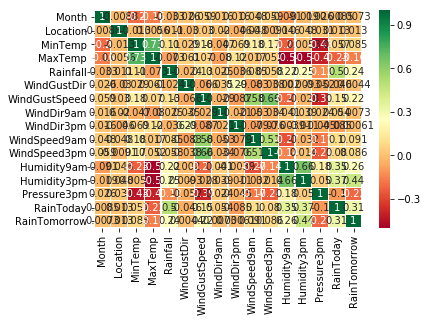

In [63]:
#see the correlation among features in df_train again
fig = sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #df_train.corr()-->correlation matrix

In [64]:
#Everything looks good.  
#Split data into 2 parts, one is training data, and the other is testing data
X_train = df_train.drop('RainTomorrow', axis = 1)
X_test = df_test.drop('RainTomorrow', axis = 1)
y_train = df_train['RainTomorrow']
y_test = df_test['RainTomorrow']
X_train.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday
103079,4,24,14.9,30.3,0.0,5.000000,33.000000,11.0,4.0,15.0,11.0,19.0,12.0,1017.80000,0.0
111021,12,35,14.6,21.5,0.2,4.000000,46.000000,5.0,5.0,26.0,28.0,65.0,57.0,1013.50000,0.0
123110,6,33,9.0,23.7,0.0,0.000000,28.000000,14.0,1.0,11.0,15.0,59.0,45.0,1015.25704,0.0
107740,1,13,15.3,24.0,0.0,6.972739,39.963065,13.0,12.0,4.0,15.0,63.0,82.0,1016.70000,0.0
70263,12,17,17.3,37.5,0.0,3.000000,39.000000,12.0,8.0,9.0,15.0,26.0,12.0,1006.20000,0.0


In [65]:
''' NORMALIZATION '''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform( X_train ) 
X_train.loc[:,:] = scaled_values

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [66]:
''' NORMALIZATION '''
scaled_values = scaler.transform( X_test ) #DO NOT USE fit METHOD BECAUSE IT'S BEEN MODIFIED ACCORDING TO X_train
X_test.loc[:,:] = scaled_values

In [67]:
''' MACHINE LEARNING '''
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [68]:
import time
t0=time.time()
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score
acc_log = accuracy_score(y_test,y_pred) *100
print(acc_log)
t_log = time.time()-t0
print(t_log)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


83.63667051112549
1.099043607711792


In [69]:
t0=time.time()
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = accuracy_score(y_test,y_pred) *100
print(acc_gaussian)
t_gaussian = time.time()-t0
print(t_gaussian)

80.49734169737546
0.05746865272521973


In [70]:
t0=time.time()
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = accuracy_score(y_test,y_pred) *100
print(acc_decision_tree)
t_decision_tree = time.time()-t0
print(t_decision_tree)

78.14565810571324
1.6160850524902344


In [71]:
t0=time.time()
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = accuracy_score(y_test,y_pred) *100
print(acc_random_forest)
t_random_forest = time.time()-t0
print(t_random_forest)

85.07974907873638
28.99893283843994


In [72]:
models = pd.DataFrame(
    {
    'ML Algorithm': ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Score': [acc_gaussian, acc_log, acc_random_forest, acc_decision_tree],
    'Time': [t_gaussian, t_log, t_random_forest, t_decision_tree]
    }
)
models.sort_values(by='Score', ascending=False)

,ML Algorithm,Score,Time
2,Random Forest,85.079749,28.998933
1,Logistic Regression,83.636671,1.099044
0,Naive Bayes,80.497342,0.057469
3,Decision Tree,78.145658,1.616085
